# Search Algorithm
This notebook allows to test different search algorithms in the maze setup.

## Depth-First Search (DFS)
This search algorithm chooses a path at any bifurcation and follows it until the end. 
It ensures to find the goal but not to find the best possible path.

In [1]:
from maze import Maze
from search import Node, StackFrontier

class DFS(Maze):

    def solve(self):
        # Keep track of number of states explored
        self.num_explored = 0

        # Initialize the starting node
        start = Node(state = self.start, parent = None, action = None)
        frontier = StackFrontier()
        frontier.add(start)

        # Initalize explored set
        self.explored = set()

        while True:

            if frontier.empty():
                raise Exception("No solution found!")
            
            node = frontier.remove()
            self.num_explored += 1

            if node.state == self.goal:
                actions = []
                cells = []
                while node.parent is not None:
                    actions.append(node.action)
                    cells.append(node.state)
                    node = node.parent

                actions.reverse()
                cells.reverse()

                self.solution = (actions, cells)
                return
            
            self.explored.add(node.state)

            # Add neighbors to frontier
            for action, state in self.neighbors(node.state):
                if not frontier.contains_state(state) and state not in self.explored:
                    child = Node(state=state, parent=node, action=action)
                    frontier.add(child)


States Explored: 317
Solution:


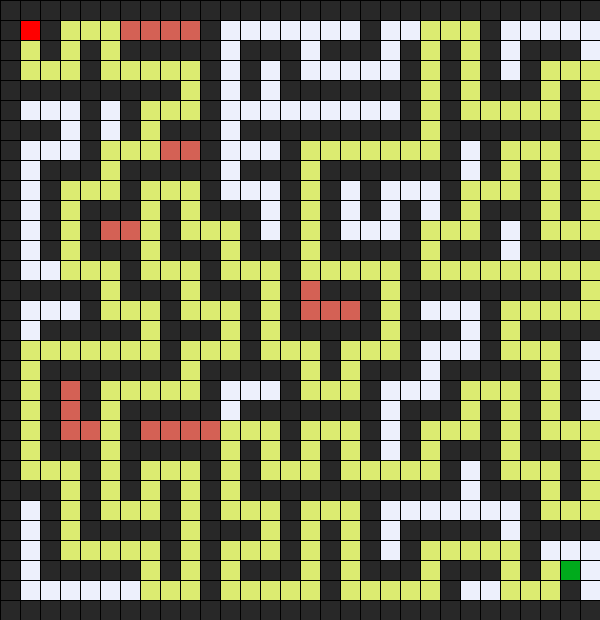

In [2]:
from IPython.display import display

m = DFS("maze4.txt")
m.solve()
print("States Explored:", m.num_explored)
print("Solution:")


img = m.output_image(show_explored=True)
display(img)

## Breadth-First Search (BFS)
This algorithm proceeds across all the possible paths one layer of distance from the start at a time. It ensure to find the shortest path.

In [14]:

from maze import Maze
from search import Node, QueueFrontier

class BFS(Maze):

    def solve(self):
        # Keep track of number of states explored
        self.num_explored = 0

        # Initialize the starting node
        start = Node(state = self.start, parent = None, action = None)
        frontier = QueueFrontier()
        frontier.add(start)

        # Initalize explored set
        self.explored = set()

        while True:

            if frontier.empty():
                raise Exception("No solution found!")
            
            node = frontier.remove()
            self.num_explored += 1

            if node.state == self.goal:
                actions = []
                cells = []
                while node.parent is not None:
                    actions.append(node.action)
                    cells.append(node.state)
                    node = node.parent

                actions.reverse()
                cells.reverse()

                self.solution = (actions, cells)
                return
            
            self.explored.add(node.state)

            # Add neighbors to frontier
            for action, state in self.neighbors(node.state):
                if not frontier.contains_state(state) and state not in self.explored:
                    child = Node(state=state, parent=node, action=action)
                    frontier.add(child)


States Explored: 442
Solution:


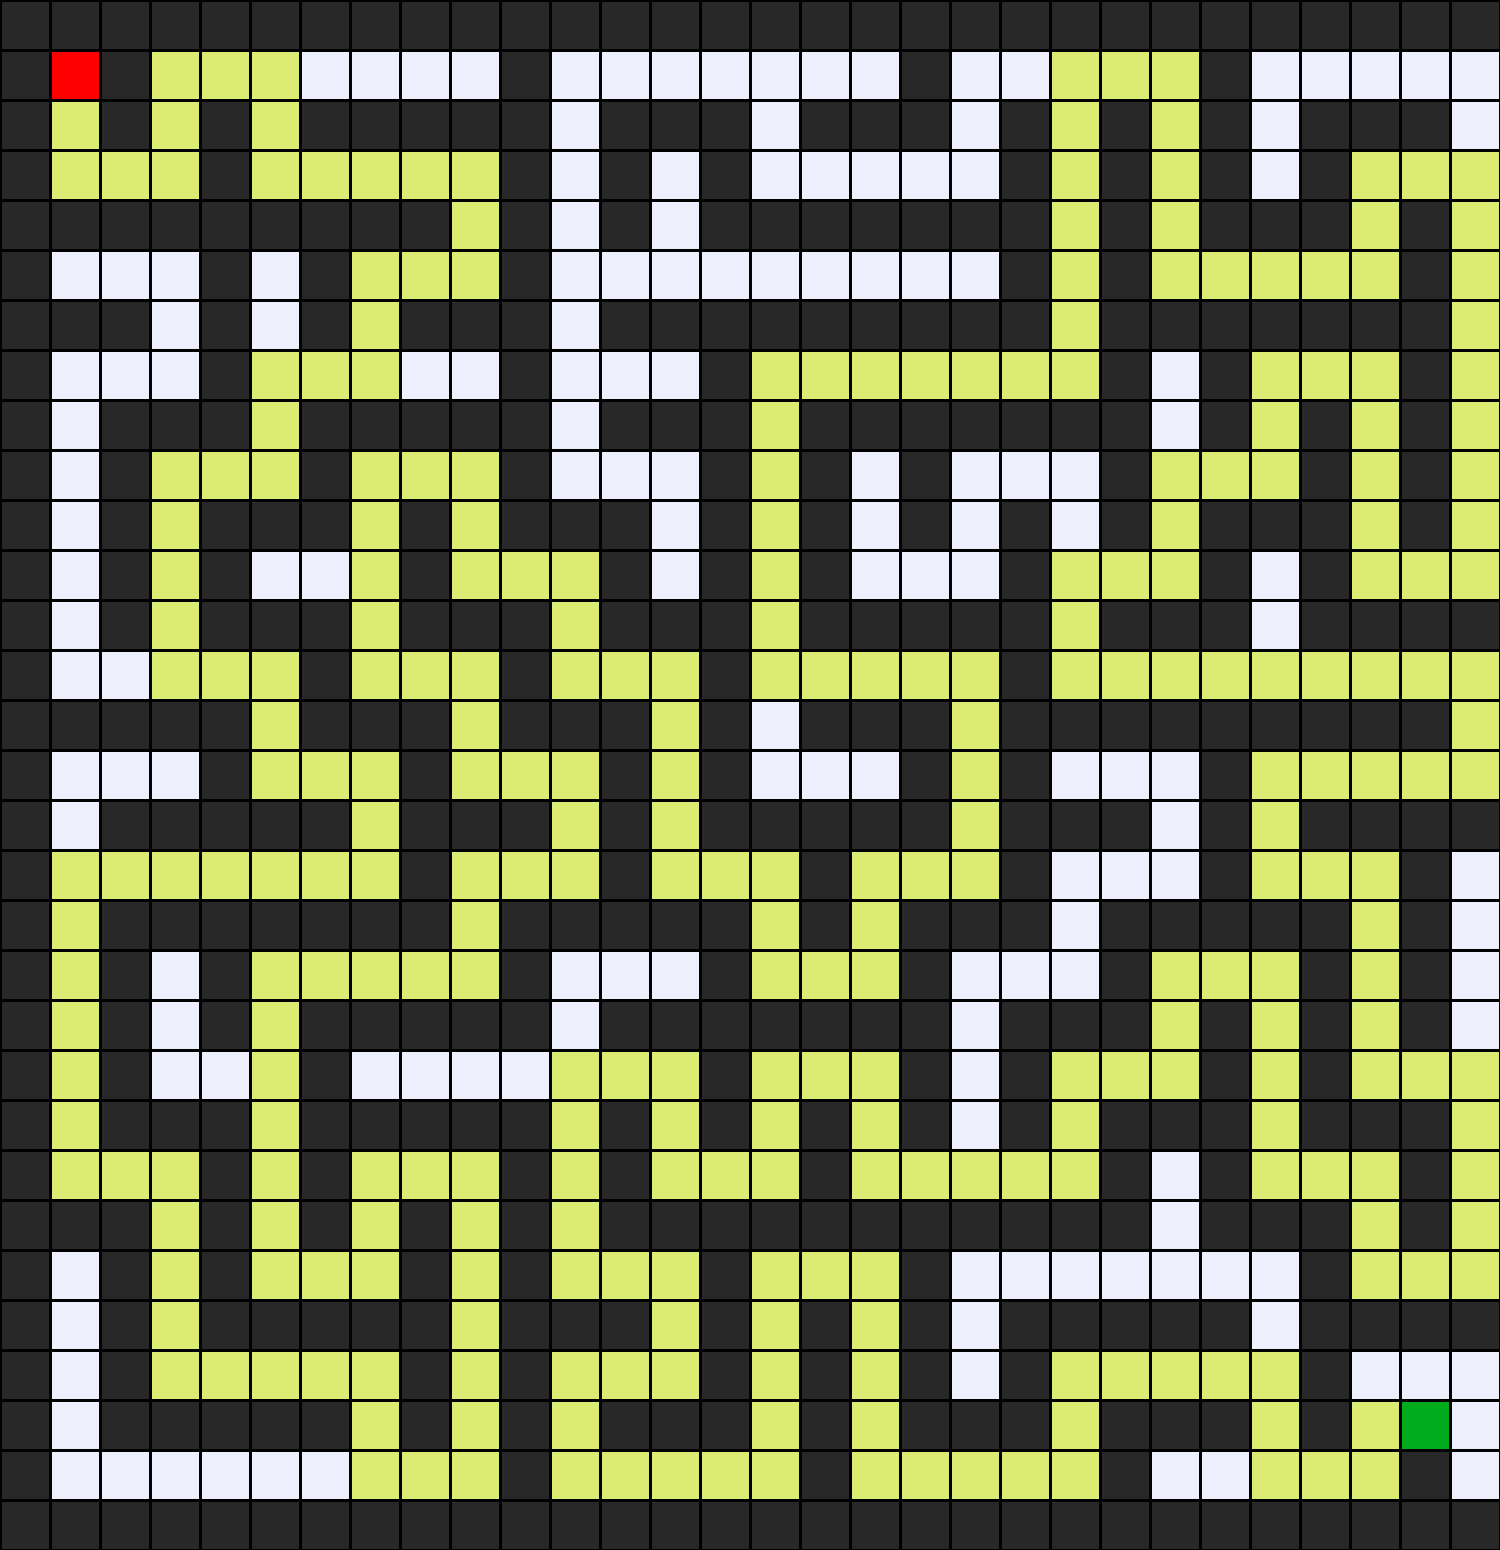

In [17]:
from IPython.display import display

m = BFS("maze4.txt")
m.solve()
print("States Explored:", m.num_explored)
print("Solution:")


img = m.output_image()
display(img)

## Gready Best-First Search
This algorithm is an improve version of the DFS. 
In order to choose the path the distance between the different states in the frontier and the goal is computed. The closest state is choosen. Note that a metric needs to be defined. In this case the Manhattan distance is implemented, which computes the sum between the y and x distance, i.e. abs(x1-x2) + abs(y1-y2).

In [21]:
from maze import Maze
from search import Node, customFrontier


class gBFS(Maze):

    def _manhattan_metric(self, state):
        """
        Returns the Manhattan distance from the current state to the goal.
        """
        x1, y1 = state
        x2, y2 = self.goal
        return abs(x1 - x2) + abs(y1 - y2)

    def solve(self):
        # Keep track of number of states explored
        self.num_explored = 0

        # Initialize the starting node
        start = Node(state = self.start, parent = None, action = None)
        frontier = customFrontier()
        frontier.add(start)

        # Initalize explored set
        self.explored = set()

        while True:

            if frontier.empty():
                raise Exception("No solution found!")
            
            
            node = frontier.remove(self._manhattan_metric)
            self.num_explored += 1

            if node.state == self.goal:
                actions = []
                cells = []
                while node.parent is not None:
                    actions.append(node.action)
                    cells.append(node.state)
                    node = node.parent

                actions.reverse()
                cells.reverse()

                self.solution = (actions, cells)
                return
            
            self.explored.add(node.state)

            # Add neighbors to frontier
            for action, state in self.neighbors(node.state):
                if not frontier.contains_state(state) and state not in self.explored:
                    child = Node(state=state, parent=node, action=action)
                    frontier.add(child)


States Explored: 342
Solution:


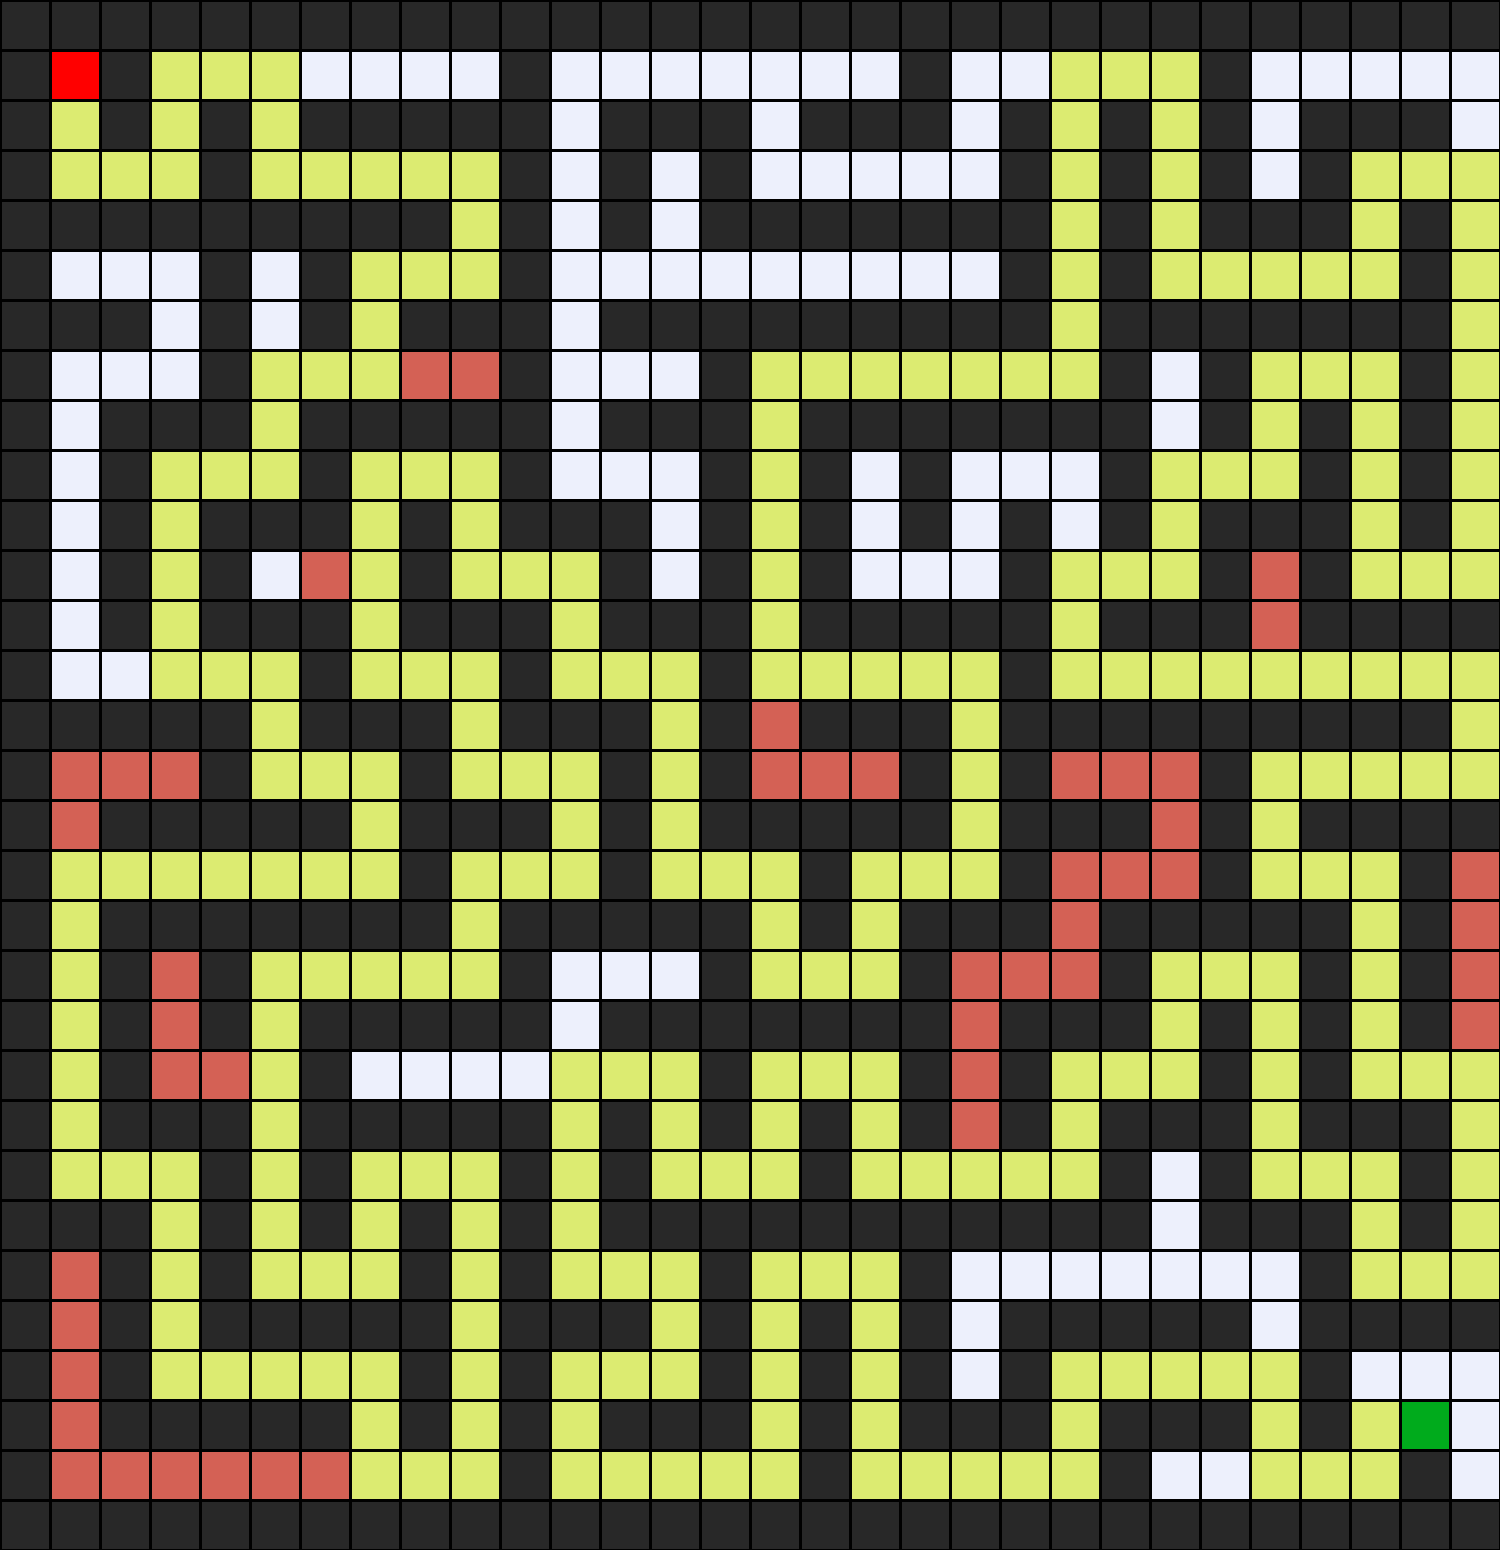

In [23]:
from IPython.display import display

m = gBFS("maze4.txt")
m.solve()
print("States Explored:", m.num_explored)
print("Solution:")


img = m.output_image(show_explored=True)
display(img)

## Alpha* Search
Alpha* is a further improved version of Best-First Search. The node is expand if it minimize the function g(n) + h(n) where g(n) is the cost to reach that node and h(n) is estimated coast to the goal (distance to the goal).

In [3]:
from maze import Maze
from search import Node, customFrontier


class alpha_star(Maze):

    def _manhattan_metric(self, state):
        """
        Returns the Manhattan distance from the current state to the goal.
        """
        x1, y1 = state
        x2, y2 = self.goal
        return abs(x1 - x2) + abs(y1 - y2)

    def solve(self):
        # Keep track of number of states explored
        self.num_explored = 0

        # Initialize the starting node
        start = Node(state = self.start, parent = None, action = None)
        frontier = customFrontier()
        frontier.add(start)

        # Initalize explored set
        self.explored = set()

        while True:

            if frontier.empty():
                raise Exception("No solution found!")
            
            
            node = frontier.remove(self._manhattan_metric)
            self.num_explored += 1

            if node.state == self.goal:
                actions = []
                cells = []
                while node.parent is not None:
                    actions.append(node.action)
                    cells.append(node.state)
                    node = node.parent

                actions.reverse()
                cells.reverse()

                self.solution = (actions, cells)
                return
            
            self.explored.add(node.state)

            # Add neighbors to frontier
            for action, state in self.neighbors(node.state):
                if not frontier.contains_state(state) and state not in self.explored:
                    child = Node(state=state, parent=node, action=action, cost = node.cost + 1)
                    frontier.add(child)



States Explored: 342
Solution:


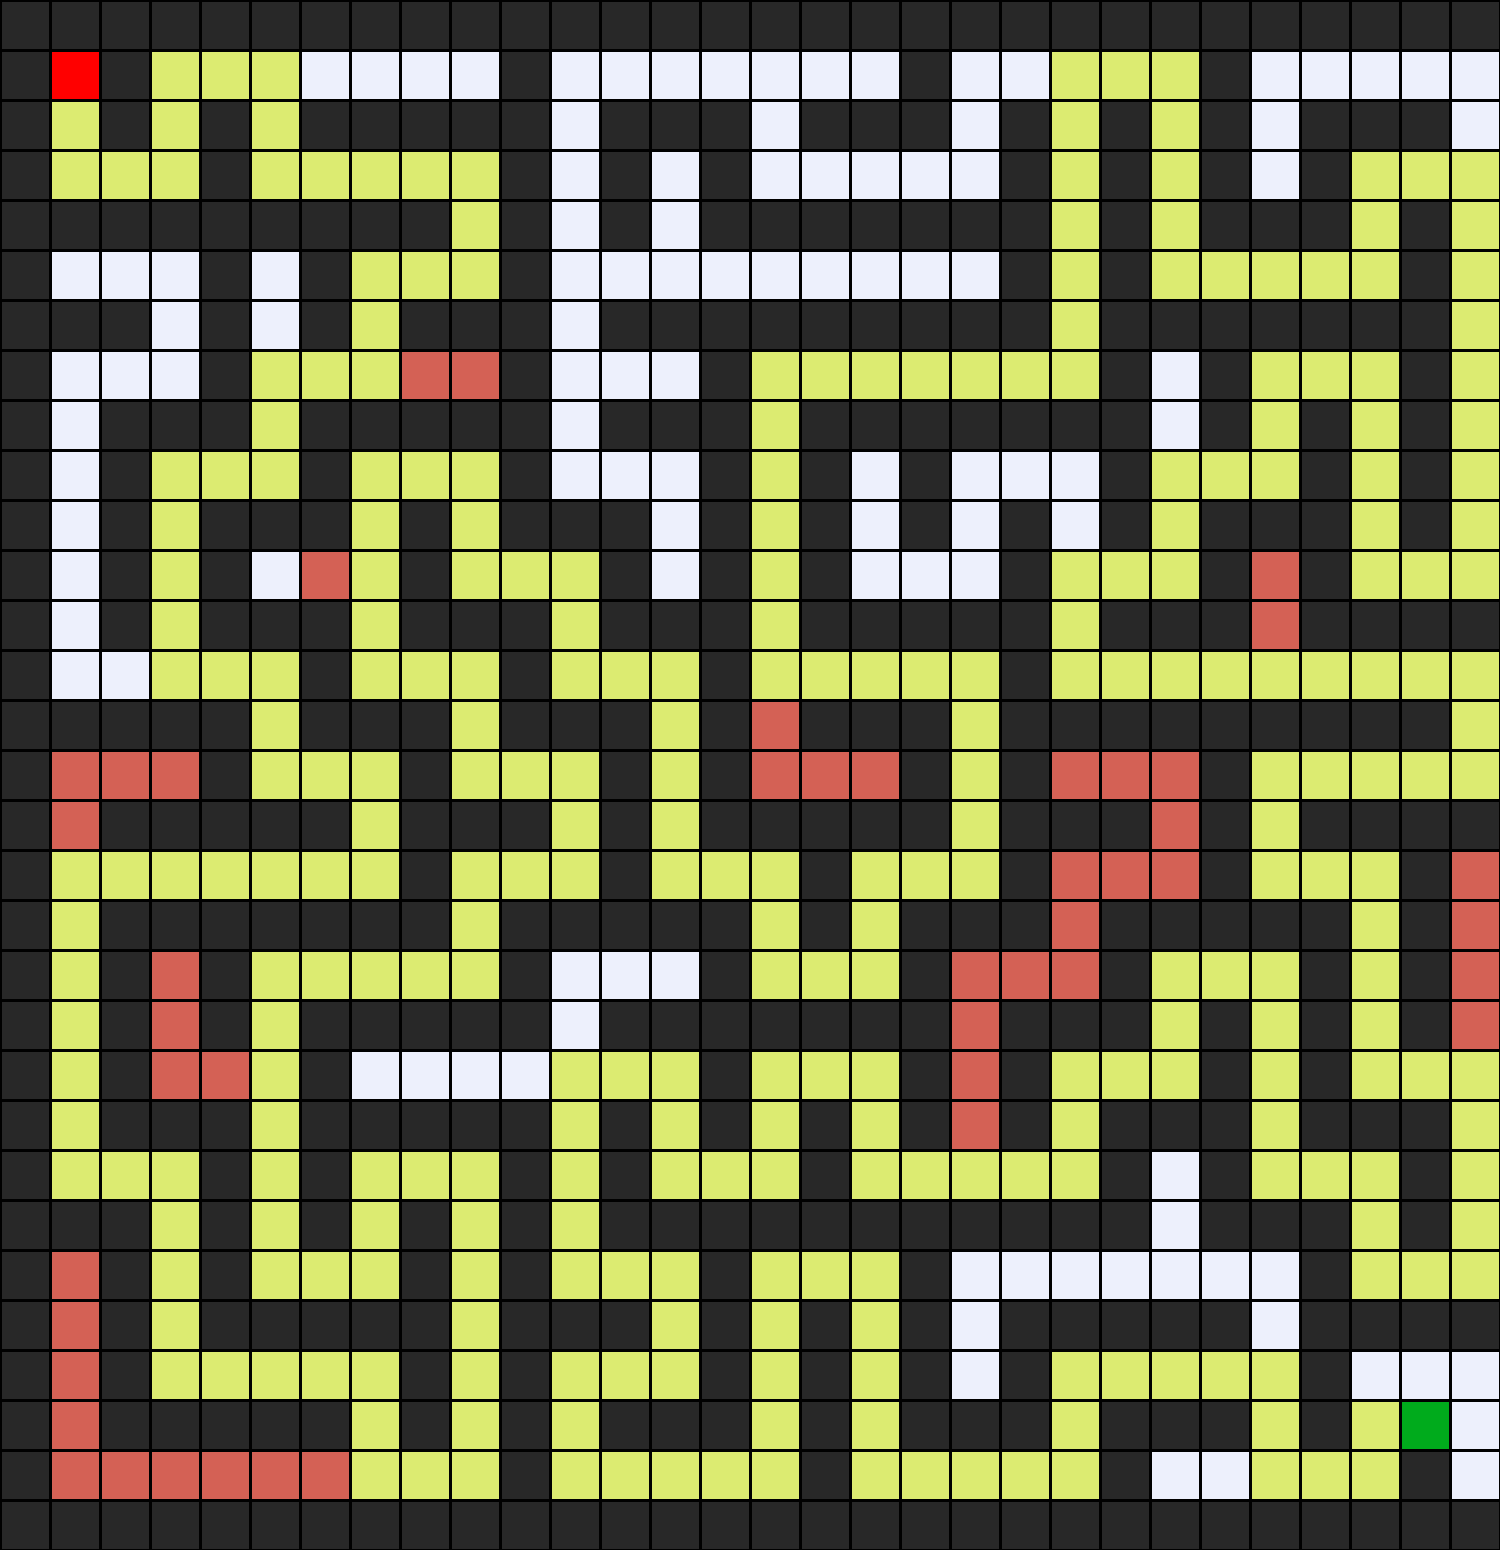

In [24]:
from IPython.display import display

m = alpha_star("maze4.txt")
m.solve()
print("States Explored:", m.num_explored)
print("Solution:")


img = m.output_image(show_explored=True)
display(img)